In [1]:
# Importing necessary Python libraries for data analysis and visualization

import pandas as pd  
# Imports the pandas library and gives it the alias 'pd'.
# Pandas is used for data manipulation and analysis, especially working with tabular data (DataFrames).

import numpy as np  
# Imports the NumPy library and gives it the alias 'np'.
# NumPy is used for numerical computing in Python, especially for arrays and mathematical operations.

import matplotlib.pyplot as plt  
# Imports the 'pyplot' module from the matplotlib library and gives it the alias 'plt'.
# This module is used for creating static, animated, and interactive visualizations in Python.

import seaborn as sns  
# Imports the seaborn library and gives it the alias 'sns'.
# Seaborn is built on top of matplotlib and is used for making statistical graphics in Python.

pd.set_option('display.max_columns', 40)  
# Sets a display option in pandas to show up to 40 columns when printing a DataFrame.
# This is helpful when working with wide datasets to ensure all columns are visible in the output.


In [2]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('dataWeather.csv')

# Convert the 'checkin_date' column to datetime format for time-based operations
df['checkin_date'] = pd.to_datetime(df['checkin_date'])

# Add a new column 'is_weekend' to indicate whether the check-in occurred on a weekend
# (Saturday=5 or Sunday=6)
df['is_weekend'] = df['checkin_date'].dt.weekday >= 5

# Display the first 5 rows of the DataFrame to inspect the data
df.head()

,checkin_business_id,checkin_date,business_name,business_address,business_city,business_state,postal_code,business_lat,business_long,star_rating,total_reviews,categories,has_tv,caters,alcohol_flag,drive_thru,good_for_kids,take_out,delivery,accepts_credit_cards,romantic,intimate,classy,hipster,divey,touristy,trendy,upscale,casual,parking_garage,parking_street,parking_validated,parking_lot,parking_valet,satisfaction,temp_max,temp_min,precip_mm,wind_max,is_weekend
0,0169EQn9SEi1bocoX5Ps1w,2019-04-19,Rainbow Grocery,4837 Magazine St,New Orleans,LA,70115,29.920566,-90.107119,4.5,21,"Food, Breakfast & Brunch, Grocery, Beer, Wine ...",True,False,1,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,79.0,59.6,5.55,10.1,False
1,033Ok264muClFlaWFeqo9g,2019-07-05,Beaucoup Eats,2323 Canal St,New Orleans,LA,70119,29.963448,-90.083409,4.0,66,"Comfort Food, Soul Food, Cajun/Creole, America...",True,True,0,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,1,73.9,62.2,5.90,23.1,False
2,033Ok264muClFlaWFeqo9g,2019-07-14,Beaucoup Eats,2323 Canal St,New Orleans,LA,70119,29.963448,-90.083409,4.0,66,"Comfort Food, Soul Food, Cajun/Creole, America...",True,True,0,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,1,80.2,71.6,10.68,12.6,True
3,033Ok264muClFlaWFeqo9g,2019-07-15,Beaucoup Eats,2323 Canal St,New Orleans,LA,70119,29.963448,-90.083409,4.0,66,"Comfort Food, Soul Food, Cajun/Creole, America...",True,True,0,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,1,87.2,49.5,3.25,18.2,False
4,033Ok264muClFlaWFeqo9g,2019-07-17,Beaucoup Eats,2323 Canal St,New Orleans,LA,70119,29.963448,-90.083409,4.0,66,"Comfort Food, Soul Food, Cajun/Creole, America...",True,True,0,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,1,73.1,58.1,7.37,13.5,False


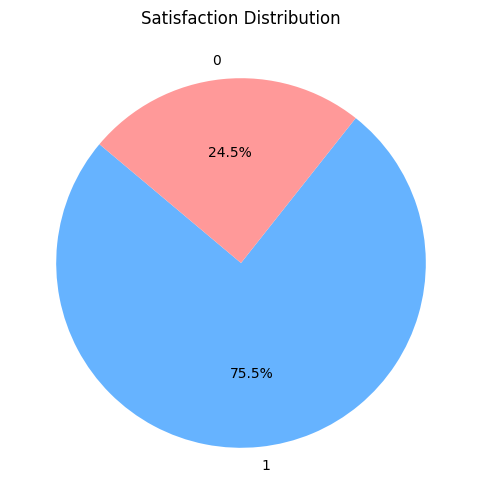

In [7]:
# Count satisfaction values
satisfaction_counts = df['satisfaction'].value_counts()
# Counts the frequency of each unique value in the 'satisfaction' column of the DataFrame.
# Returns a Series where the index is the unique satisfaction levels and the values are their counts.

# Plot pie chart
plt.figure(figsize=(6,6))  
# Creates a new figure for the plot with a width and height of 6 inches.

plt.pie(
    satisfaction_counts,                         # The values to plot (counts of satisfaction levels)
    labels=satisfaction_counts.index,            # Labels for each wedge (satisfaction levels)
    autopct='%1.1f%%',                           # Display percentage with 1 decimal place on each wedge
    startangle=140,                              # Rotates the start angle of the pie chart for better appearance
    colors=['#66b3ff', '#ff9999']                # Custom colors for the pie slices
)

plt.title('Satisfaction Distribution')  
# Sets the title of the pie chart.

plt.show()  
# Displays the pie chart.

<Axes: title={'center': 'Star Rating Distribution'}, xlabel='star_rating'>

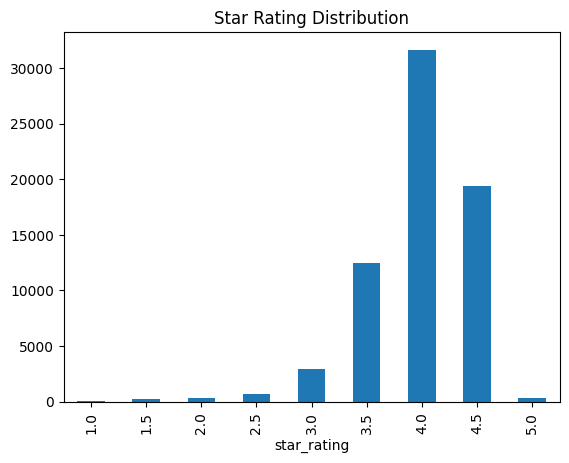

In [9]:
"""
This line performs the following operations:
1. Selects the 'star_rating' column from the DataFrame.
2. Counts the frequency of each unique star rating using value_counts().
3. Sorts the resulting counts by the star rating values (e.g., 1 to 5) using sort_index().
4. Plots the sorted counts as a vertical bar chart using plot(kind='bar').
5. Adds the title 'Star Rating Distribution' to the chart.

The final output is a bar chart that visually displays how many entries exist for each star rating.
"""

df['star_rating'].value_counts().sort_index().plot(kind='bar', title='Star Rating Distribution')


In [15]:
import folium  # Imports the folium library for creating interactive maps

# Drop duplicates based on 'checkin_business_id'
unique_df = df.drop_duplicates(subset='checkin_business_id')
# Removes duplicate entries based on the 'checkin_business_id' column.
# Keeps only one entry per unique business location.

# Center the map using the mean coordinates
map_center = [unique_df['business_lat'].mean(), unique_df['business_long'].mean()]
# Calculates the average latitude and longitude of all unique businesses to center the map.

# Create the map
m = folium.Map(location=map_center, zoom_start=10)
# Initializes a folium map centered at the calculated location with zoom level 10.

# Add circle markers for each unique business 
for idx, row in unique_df.iterrows():  #
    folium.CircleMarker(
        location=[row['business_lat'], row['business_long']],  # Marker coordinates
        radius=3,                                               # Radius of the circle
        popup=f"{row['business_name']} ({row['star_rating']} stars)",  # Info popup
        color='blue',                                           # Outline color
        fill=True,                                              # Fill the circle
        fill_opacity=0.6                                        # Transparency of fill
    ).add_to(m)  # Adds the marker to the map

# Display the map
m

"""
This script visualizes the location of unique businesses on an interactive map using folium:

1. Removes duplicate check-ins to ensure each business is only plotted once.
2. Computes the mean latitude and longitude to center the map.
3. Initializes a folium map centered at that location.
4. Iterates over each unique business and adds a small blue circle marker at its location.
   Each marker includes a popup with the business name and star rating.
5. The resulting map (object `m`) shows all the business locations interactively.
"""


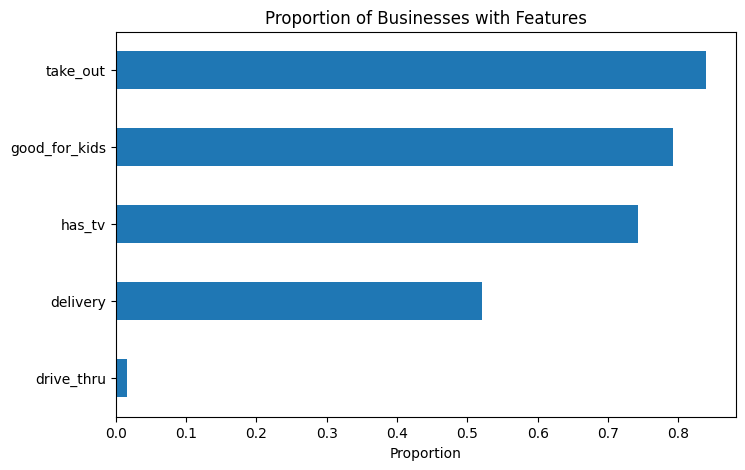

In [24]:
feature_cols = ['take_out', 'delivery', 'drive_thru', 'good_for_kids', 'has_tv']
# Defines a list of column names representing different business features to analyze.

df[feature_cols].mean() \
    .sort_values() \
    .plot(kind='barh', figsize=(8,5), title="Proportion of Businesses with Features")
# 1. Selects only the feature columns from the DataFrame.
# 2. Calculates the mean of each column, representing the proportion (as boolean columns are 0 or 1).
# 3. Sorts the proportions in ascending order.
# 4. Plots the result as a horizontal bar chart with a specified figure size and title.

plt.xlabel("Proportion")
# Adds a label to the x-axis to indicate that the values represent proportions.

plt.show()
# Displays the plot.

"""
This code visualizes the proportion of businesses that offer specific features such as take-out,
delivery, or having a TV. It works as follows:

1. Defines which columns (features) to analyze.
2. Computes the mean of each boolean feature column, giving the fraction of businesses with that feature.
3. Sorts these proportions to show the least to most common features.
4. Plots the result as a horizontal bar chart for easier comparison.
5. Adds an x-axis label and displays the plot.

This is useful for quickly understanding which features are most and least common across businesses.
"""


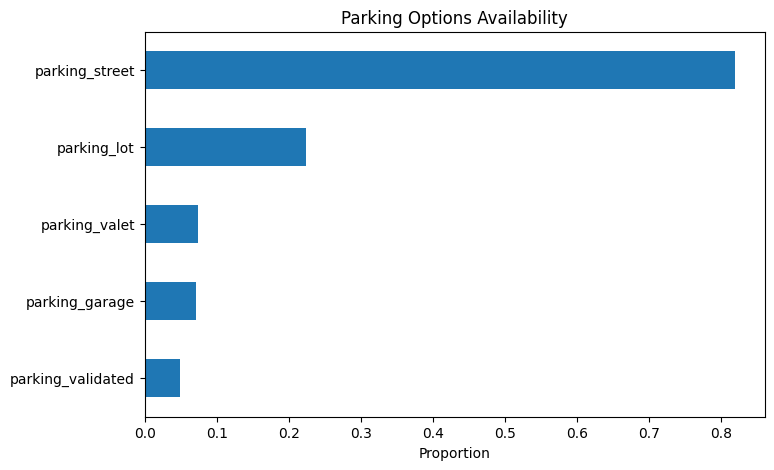

In [26]:
parking_cols = ['parking_garage', 'parking_street', 'parking_validated', 'parking_lot', 'parking_valet']
# Defines a list of column names related to different types of parking options available at businesses.

df[parking_cols].mean().sort_values().plot(kind='barh', figsize=(8,5), title="Parking Options Availability")
# 1. Selects only the parking-related columns from the DataFrame.
# 2. Computes the mean of each column (since they are boolean: 1 = available, 0 = not).
#    This gives the proportion of businesses offering each parking option.
# 3. Sorts the proportions in ascending order.
# 4. Plots the sorted values as a horizontal bar chart with the specified figure size and title.

plt.xlabel("Proportion")
# Sets the label for the x-axis to indicate the values represent proportions (0 to 1 scale).

plt.show()
# Renders and displays the plot.

"""
This code analyzes and visualizes the availability of different parking options across businesses.
Here's what it does:

1. Specifies which columns represent types of parking (garage, street, valet, etc.).
2. Calculates the proportion of businesses that offer each type of parking.
3. Sorts the results to display parking types from least to most commonly available.
4. Creates a horizontal bar chart to visualize these proportions.
5. Adds an x-axis label and displays the chart.

This helps quickly identify which parking options are most and least commonly offered.
"""
